In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**POS_CASH_balance.csv**
*   Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
*   This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample.

**installments_payments.csv**


*   Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
*   There is
    *   a) one row for every payment that was made plus
    *   b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**POS_CASH_balance.csv FEATURE DESCRIPTION**

**SK_ID_PREV:** The ID of previous credit in Home Credit related to loan in our sample

**SK_ID_CURR:** ID of loan in our sample

**MONTHS_BALANCE:** Month of balance relative to application date

**CNT_INSTALMENT:** Term of previous credit (can change over time)

**CNT_INSTALMENT_FUTURE:** Installments left to pay on the previous credit

**NAME_CONTRACT_STATUS:** Contract status during the month

**SK_DPD:** DPD (days past due) during the month of previous credit

**SK_DPD_DEF:** DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


**installments_payments.csv FEATURE DESCRIPTION**

**SK_ID_CURR:** ID of loan in our sample

**NUM_INSTALMENT_VERSION:** Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

**NUM_INSTALMENT_NUMBER:** On which installment we observe payment

**DAYS_INSTALMENT:** When the installment of previous credit was supposed to be paid (relative to application date of current loan)

**DAYS_ENTRY_PAYMENT:** When was the installments of previous credit paid actually (relative to application date of current loan)

**AMT_INSTALMENT:** What was the prescribed installment amount of previous credit on this installment

**AMT_PAYMENT:** What the client actually paid on previous credit on this installment

In [ ]:
pos_cash = pd.read_csv('POS_CASH_balance.csv')
install_payments = pd.read_csv('installments_payments.csv')

**POS_CASH_balance.csv**

In [ ]:
pos_cash.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [ ]:
pos_cash.shape

(10001358, 8)

In [ ]:
pos_cash.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


**Basic EDA**

In [ ]:
pos_cash.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0


In [ ]:
# check duplicate
pos_cash.duplicated().sum()

0

In [ ]:
# NUMBER OF NULL VALUES IN EACH COLUMN
pos_cash.isna().sum().sort_values(ascending=False)

CNT_INSTALMENT_FUTURE    26087
CNT_INSTALMENT           26071
SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
# PERCENTAGE OF NULL VALUES IN EACH COLUMN
(pos_cash.isna().sum() / pos_cash.shape[0]).sort_values(ascending=False)

CNT_INSTALMENT_FUTURE    0.002608
CNT_INSTALMENT           0.002607
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

missing data < 1%

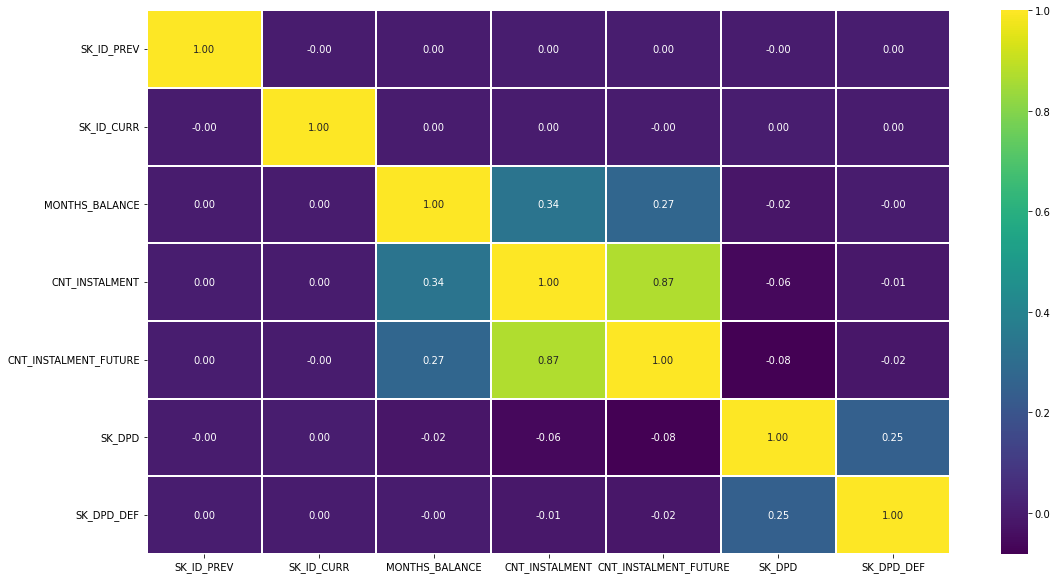

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(pos_cash[['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',\
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',\
       'SK_DPD_DEF']].corr(),cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax=ax)
plt.show()

không bỏ cột nào

SK_ID_PREV, SK_ID_CURR tạo thành composite key

CNT_INSTALLMENT và CNT_INSTALLMENT_FUTURE tuy có high correlation nhưng là biến quan trọng

**Visualization**

In [ ]:
pos_cash['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

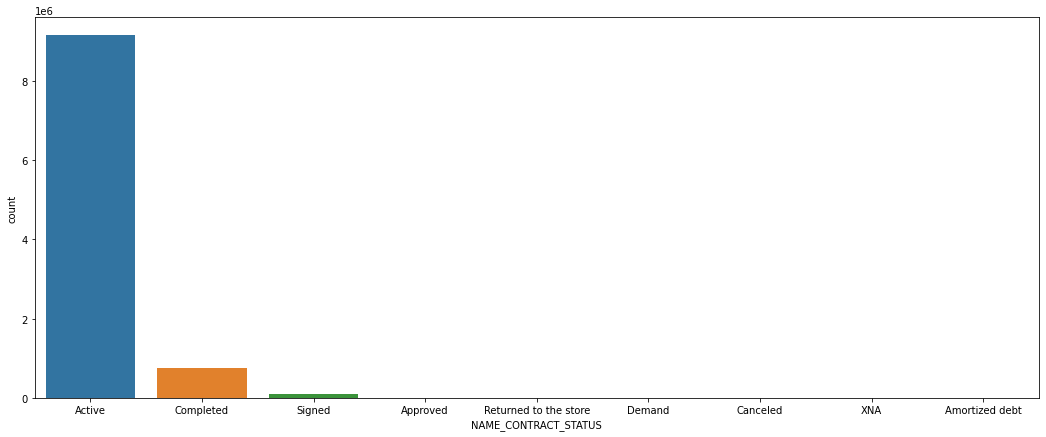

In [ ]:
fig, ax = plt.subplots(figsize = (18, 7))
sns.countplot(x = 'NAME_CONTRACT_STATUS', data = pos_cash)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


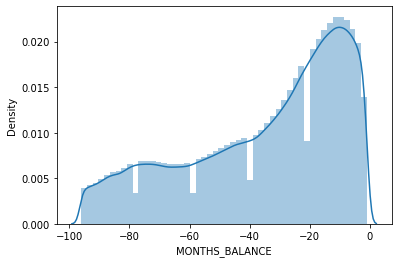

In [ ]:
sns.distplot(pos_cash.MONTHS_BALANCE)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


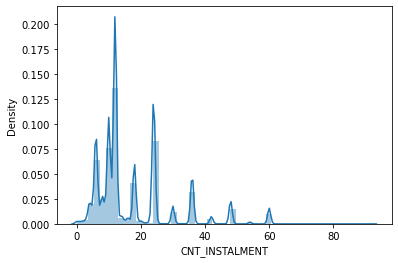

In [ ]:
sns.distplot(pos_cash.CNT_INSTALMENT.fillna(0))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


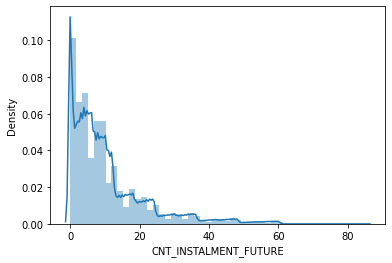

In [ ]:
sns.distplot(pos_cash.CNT_INSTALMENT_FUTURE.fillna(0))

**installments_payments.csv**

In [ ]:
install_payments.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674.0,1.0,6.0,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639.0,0.0,34.0,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053.0,2.0,1.0,-63.0,-63.0,25425.000,25425.000
3,2452527,199697.0,1.0,3.0,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756.0,1.0,2.0,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489.0,1.0,12.0,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693.0,4.0,11.0,-349.0,-352.0,29432.295,29432.295
7,1818599,111420.0,2.0,4.0,-968.0,-994.0,17862.165,17862.165
8,2723183,112102.0,0.0,14.0,-197.0,-197.0,70.740,70.740
9,1413990,109741.0,1.0,4.0,-570.0,-609.0,14308.470,14308.470


In [ ]:
install_payments.shape

(7734185, 8)

In [ ]:
install_payments.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [ ]:
install_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734185 entries, 0 to 7734184
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              float64
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   float64
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(7), int64(1)
memory usage: 472.1 MB


**Basic EDA**

In [ ]:
install_payments.duplicated().sum()

0

In [ ]:
# NUMBER OF NULL VALUES IN EACH COLUMN
install_payments.isna().sum().sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        1505
AMT_PAYMENT               1505
SK_ID_CURR                   1
NUM_INSTALMENT_VERSION       1
NUM_INSTALMENT_NUMBER        1
DAYS_INSTALMENT              1
AMT_INSTALMENT               1
SK_ID_PREV                   0
dtype: int64

In [ ]:
# PERCENTAGE OF NULL VALUES IN EACH COLUMN
(install_payments.isna().sum() / install_payments.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        1.945906e-04
AMT_PAYMENT               1.945906e-04
SK_ID_CURR                1.292961e-07
NUM_INSTALMENT_VERSION    1.292961e-07
NUM_INSTALMENT_NUMBER     1.292961e-07
DAYS_INSTALMENT           1.292961e-07
AMT_INSTALMENT            1.292961e-07
SK_ID_PREV                0.000000e+00
dtype: float64

Two columns: the day and the amount customers actually paid (DAYS_ENTRY_PAYMENT and AMT_PAYMENT) include the same amount of null values

0.02% of clients haven't paid previous credit on this installment

**Sumarization**

In [ ]:
install_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,7734185.0,1.902429e+06,536334.437902,2579.0,1431369.000,1.895347e+06,2369175.000,2843499.000
SK_ID_CURR,7734184.0,2.024503e+05,60212.658010,100001.0,151082.000,2.017660e+05,252384.000,399998.000
NUM_INSTALMENT_VERSION,7734184.0,8.557079e-01,1.015123,0.0,0.000,1.000000e+00,1.000,178.000
NUM_INSTALMENT_NUMBER,7734184.0,1.887490e+01,26.706530,1.0,4.000,8.000000e+00,19.000,275.000
DAYS_INSTALMENT,7734184.0,-1.042286e+03,801.013628,-2922.0,-1654.000,-8.180000e+02,-361.000,-2.000
DAYS_ENTRY_PAYMENT,7732680.0,-1.051126e+03,800.658742,-3160.0,-1663.000,-8.270000e+02,-370.000,-2.000
AMT_INSTALMENT,7734184.0,1.706066e+04,50812.213163,0.0,4219.155,8.858722e+03,16690.815,3771487.845
AMT_PAYMENT,7732680.0,1.724676e+04,55003.044500,0.0,3387.735,8.105085e+03,16075.080,3771487.845


That the average AMT_INSTALLMENTS (the prescribed installment amount on this installment is) smaller than AMT_PAYMENTS (the amount client actually paid on this installment) suggests:

Some loans are not repayed on time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1efb6aa190>,
      dtype=object)

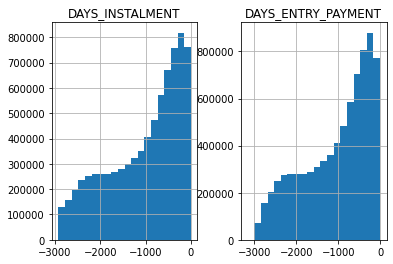

In [ ]:
# histogram
install_payments.iloc[:,4:6].hist(bins=20)

The histogram of prescribed installment day and actually paid day also suggests late payment of the customer

Correlation

In [ ]:
install_payments.corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.003484,0.003544,-0.005596,0.003641,0.003619,0.003078,0.002876
SK_ID_CURR,0.003484,1.000000,-0.000370,-0.000667,0.002993,0.003025,-0.000529,-0.000363
NUM_INSTALMENT_VERSION,0.003544,-0.000370,1.000000,-0.329795,0.131527,0.129339,0.170486,0.179050
NUM_INSTALMENT_NUMBER,-0.005596,-0.000667,-0.329795,1.000000,0.090540,0.094567,-0.089088,-0.087129
DAYS_INSTALMENT,0.003641,0.002993,0.131527,0.090540,1.000000,0.999490,0.125724,0.126652
DAYS_ENTRY_PAYMENT,0.003619,0.003025,0.129339,0.094567,0.999490,1.000000,0.125305,0.126245
AMT_INSTALMENT,0.003078,-0.000529,0.170486,-0.089088,0.125724,0.125305,1.000000,0.936853
AMT_PAYMENT,0.002876,-0.000363,0.179050,-0.087129,0.126652,0.126245,0.936853,1.000000


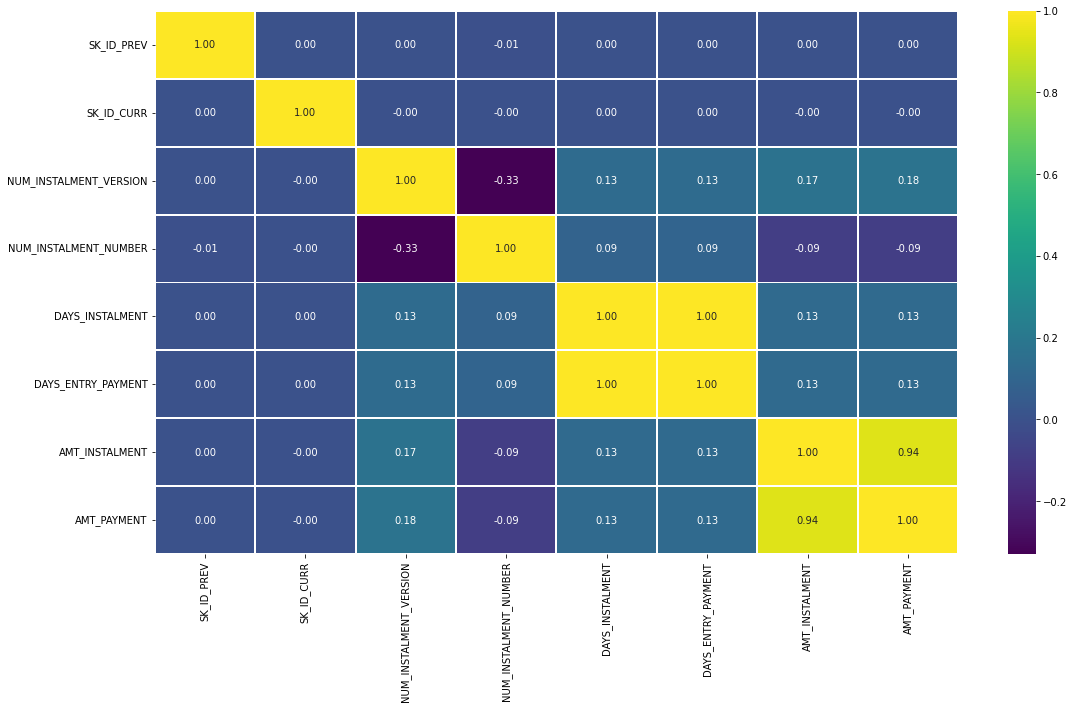

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(install_payments[['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',\
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',\
       'AMT_INSTALMENT', 'AMT_PAYMENT']].corr(), cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax = ax)

plt.show()

không bỏ cột nào

SK_ID_PREV, SK_ID_CURR tạo thành composite key

AMT_PAYMENT và AMT_INSTALLMENT tuy có high correlation nhưng là biến quan trọng,

để xác định xem khách hàng có còn nợ không